In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
print("Number of Row",df.shape[0])
print("Number of columns",df.shape[1])

Number of Row 1338
Number of columns 7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe(
)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [13]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [14]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2,'northwest':3,'northeast':4})

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [18]:
X=df.drop(['charges'], axis=1)  #use captical letter for matric 
X.head()  #independent varibale

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [19]:
y=df['charges'] #and small for verctor
y.tail() #response varible or dependent variable

1333    10600.5483
1334     2205.9808
1335     1629.8335
1336     2007.9450
1337    29141.3603
Name: charges, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
# X_train = it contain features which is independet variable
# y_train= target and response varible
# X_test = test data of independent variable
# y_test= target varibale after performing match the result with it

# Model Training

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR# suppor vector regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
svm= SVR()
svm.fit(X_train,y_train)

SVR()

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

# Prediction on Test data

In [28]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [29]:
import pandas as pd

df1 = pd.DataFrame({
    'Actual': y_test,
    'lr': y_pred1,
    'svm': y_pred2,
    'rf': y_pred3,
    'gr': y_pred4
})


In [30]:
df1.head()

,Actual,lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11985.564350,11001.128629
887,5272.17580,7116.295018,9492.515425,5033.941490,5840.174656
890,29330.98315,36909.013521,9648.758701,28127.474556,28001.980112
1293,9301.89355,9507.874691,9555.044136,9647.679363,9745.291602
259,33750.29180,27013.350008,9420.421978,34409.869768,33639.100981


In [31]:
import matplotlib.pyplot as plt

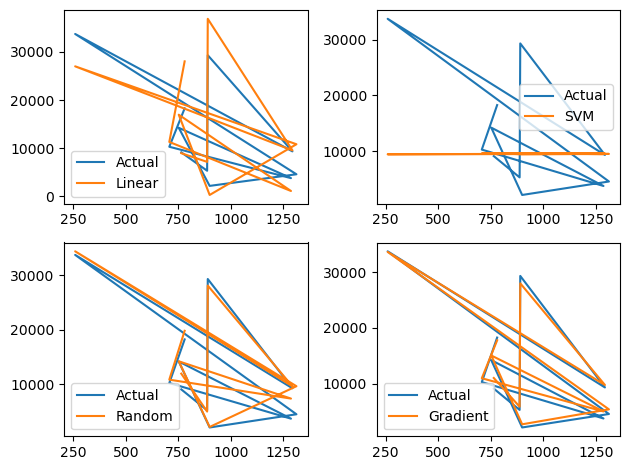

In [32]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='Linear')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='Random')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='Gradient')
plt.tight_layout()
plt.legend()

In [33]:
from sklearn import metrics

In [34]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [35]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8633533465717158 0.8779936181637191


In [36]:
s1= metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3= metrics.mean_absolute_error(y_test,y_pred3)
s4= metrics.mean_absolute_error(y_test,y_pred4)

In [37]:
print(s1,s2,s3,s4)

4186.508898366433 8592.428727899724 2505.2029950724195 2447.167158715135


# predicting charges for new customer

In [49]:
data ={'age':40,
      'sex':1,
       'bmi':40.30,
       'children':5,
       'smoker':1,
       'region':2
      }
df1 = pd.DataFrame(data,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,5,1,2


In [50]:
new_predict = gr.predict(df1)
print(new_predict)

[44757.24853851]


# Save Mdel using Joblib

In [51]:
# To save model need to train whole model 

In [52]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [53]:
import joblib

In [54]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [55]:
model = joblib.load('model_joblib_gr')

In [57]:
model.predict(df1)    # both prediction will vary becuasse this it trained on whole datsets

array([42148.361888])

# GUI

In [60]:
from tkinter import *

In [61]:
import joblib

In [76]:
from tkinter import Tk, Label, Entry, Button
import joblib

def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1, p2, p3, p4, p5, p6]])
    
    Label(master, text="Insurance Cost").grid(row=7)  # Fix the typo here
    Label(master, text=result).grid(row=8)
    
master = Tk()
master.title("Insurance Cost Prediction")
Label(master, text="Insurance Cost Prediction", bg='black', fg='white').grid(row=0, columnspan=2)
Label(master, text="Enter your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=2)  # Fix the typo here
Label(master, text="Enter your BMI value").grid(row=3)
Label(master, text="Enter Number of Children").grid(row=4)
Label(master, text="Smoker Yes/No [1/0]").grid(row=5)
Label(master, text="Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master, text="Predict", command=show_entry).grid()

master.mainloop()


C:\Users\MAYANK KUMAR\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
